In [1]:
import sys ###pfc1
sys.path.append('../scripts/')
from qmdp import *
from sensor_reset_mcl import *

In [2]:
class PfcAgent(QmdpAgent):
    def __init__(self, time_interval, estimator, goal, puddles, sampling_num=10, widths=np.array([0.2, 0.2, math.pi/18]).T, \
                 puddle_coef=100.0, lowerleft=np.array([-4, -4]).T, upperright=np.array([4, 4]).T): 
        super().__init__(time_interval, estimator, goal, puddles, sampling_num, widths, puddle_coef, lowerleft, upperright)

<IPython.core.display.Javascript object>


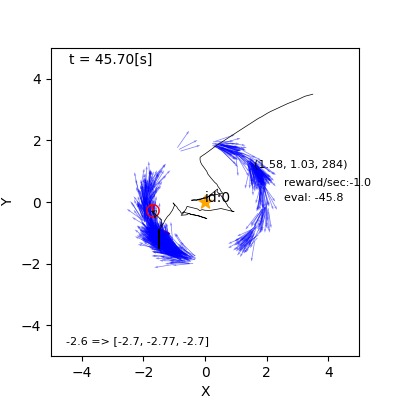

In [8]:
def trial(animation):
    time_interval = 0.1
    world = PuddleWorld(300, time_interval, debug=not animation) 

    ##ランドマークの追加（1個だけ）##
    m = Map()
    m.append_landmark(Landmark(0,0))
    world.append(m) 
    
    ##ゴール##
    goal = Goal(-1.5,-1.5)
    world.append(goal)
    
    ##ロボットを作る##
    pf = ResetMcl(m, [-10, -10, 0], 1000)              #誘拐状態から始める（すぐセンサリセットされる）
    a = PfcAgent(time_interval, pf, goal, [])           #水たまりはナシに。空のリストを渡す
    r = Robot(np.array([3.5, 3.5, np.pi]).T, sensor=Camera(m), agent=a, color="red")

    world.append(r)
    world.draw()
    
trial(True)